In [5]:
import os
import cv2
import math
import glob
import numpy as np
import matplotlib.pyplot as plt

import zipfile_deflate64 as zipfile
from urllib.request import urlretrieve

%matplotlib inline

In [6]:
def download_and_unzip(url, save_path):
    print(f"Downloading {url}...", end="")

    urlretrieve(url, save_path)

    try:
        with zipfile.ZipFile(save_path) as zf:
            zf.extractall(os.path.split(save_path)[0])

            print("Done")

    except Exception as e:
        print("\Invalid file.", e)

In [7]:
URL = r"https://www.dropbox.com/s/0o5yqql1ynx31bi/opencv_bootcamp_assets_NB9.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB9.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [8]:
# Read Images

imagefiles = glob.glob(f"boat{os.sep}*")
imagefiles.sort()


images = []
for filename in imagefiles:
    img = cv2.imread(filename)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    images.append(img)

num_images = len(images)

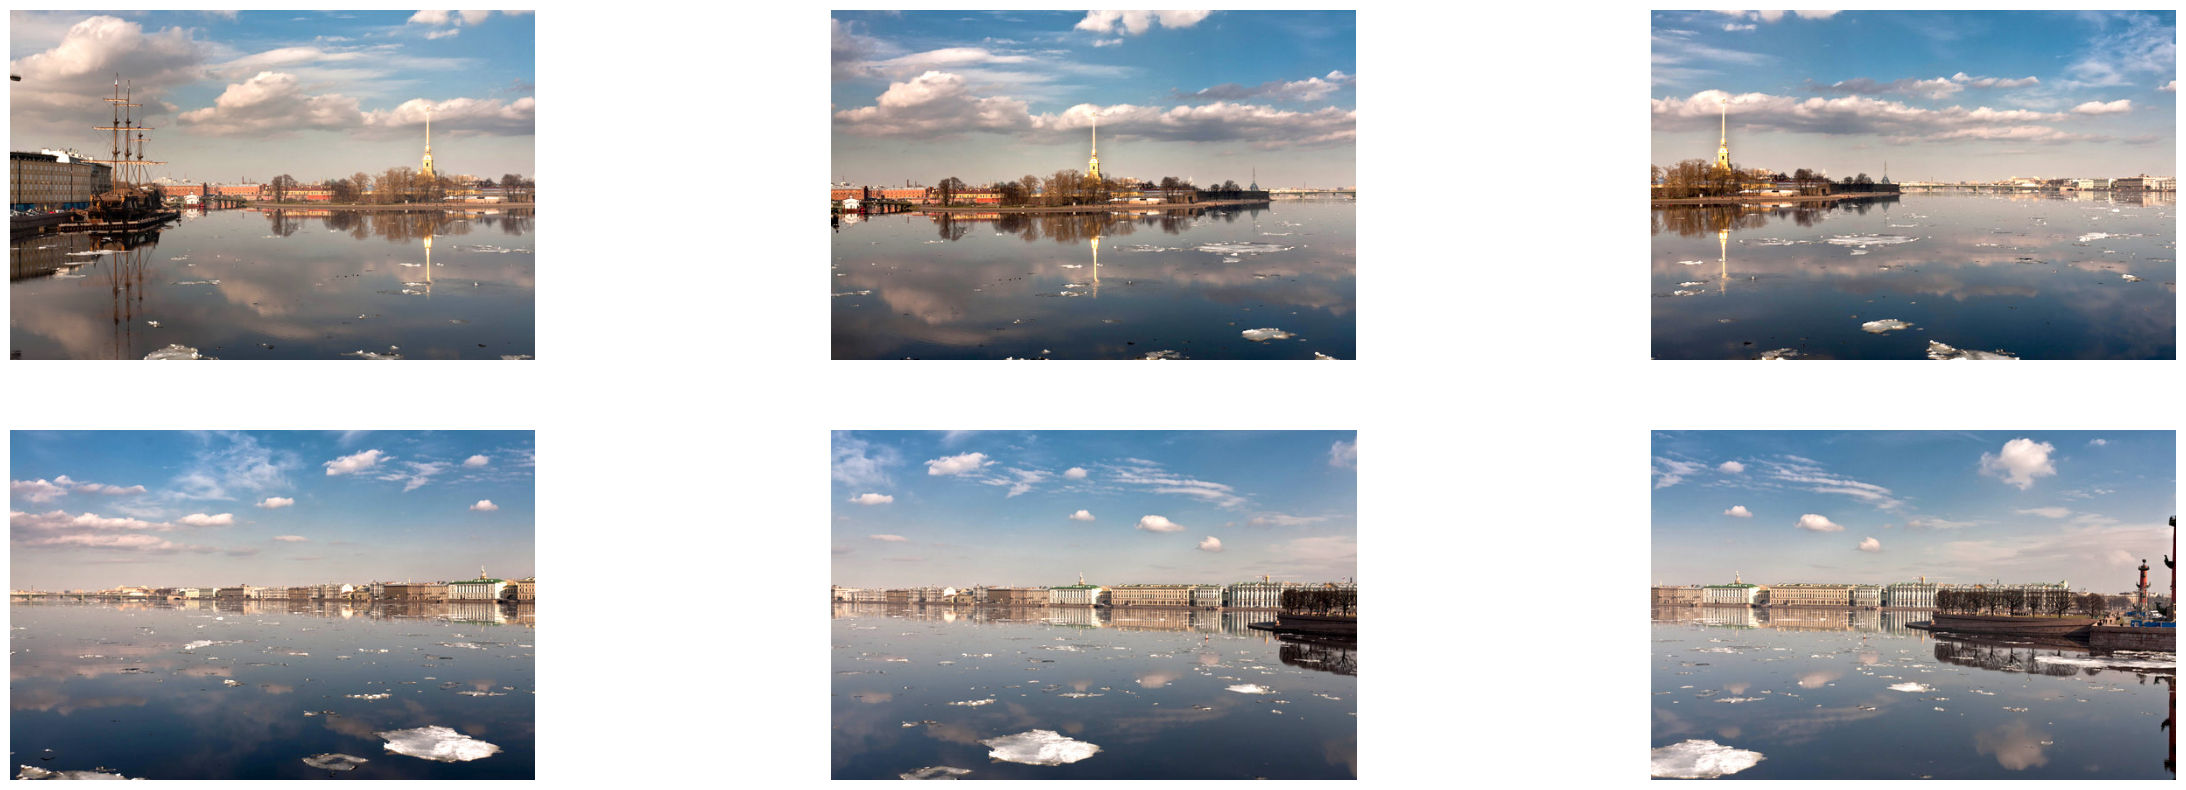

In [9]:
# Display Images
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images / num_cols)
for i in range(0, num_images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.axis("off")
    plt.imshow(images[i])

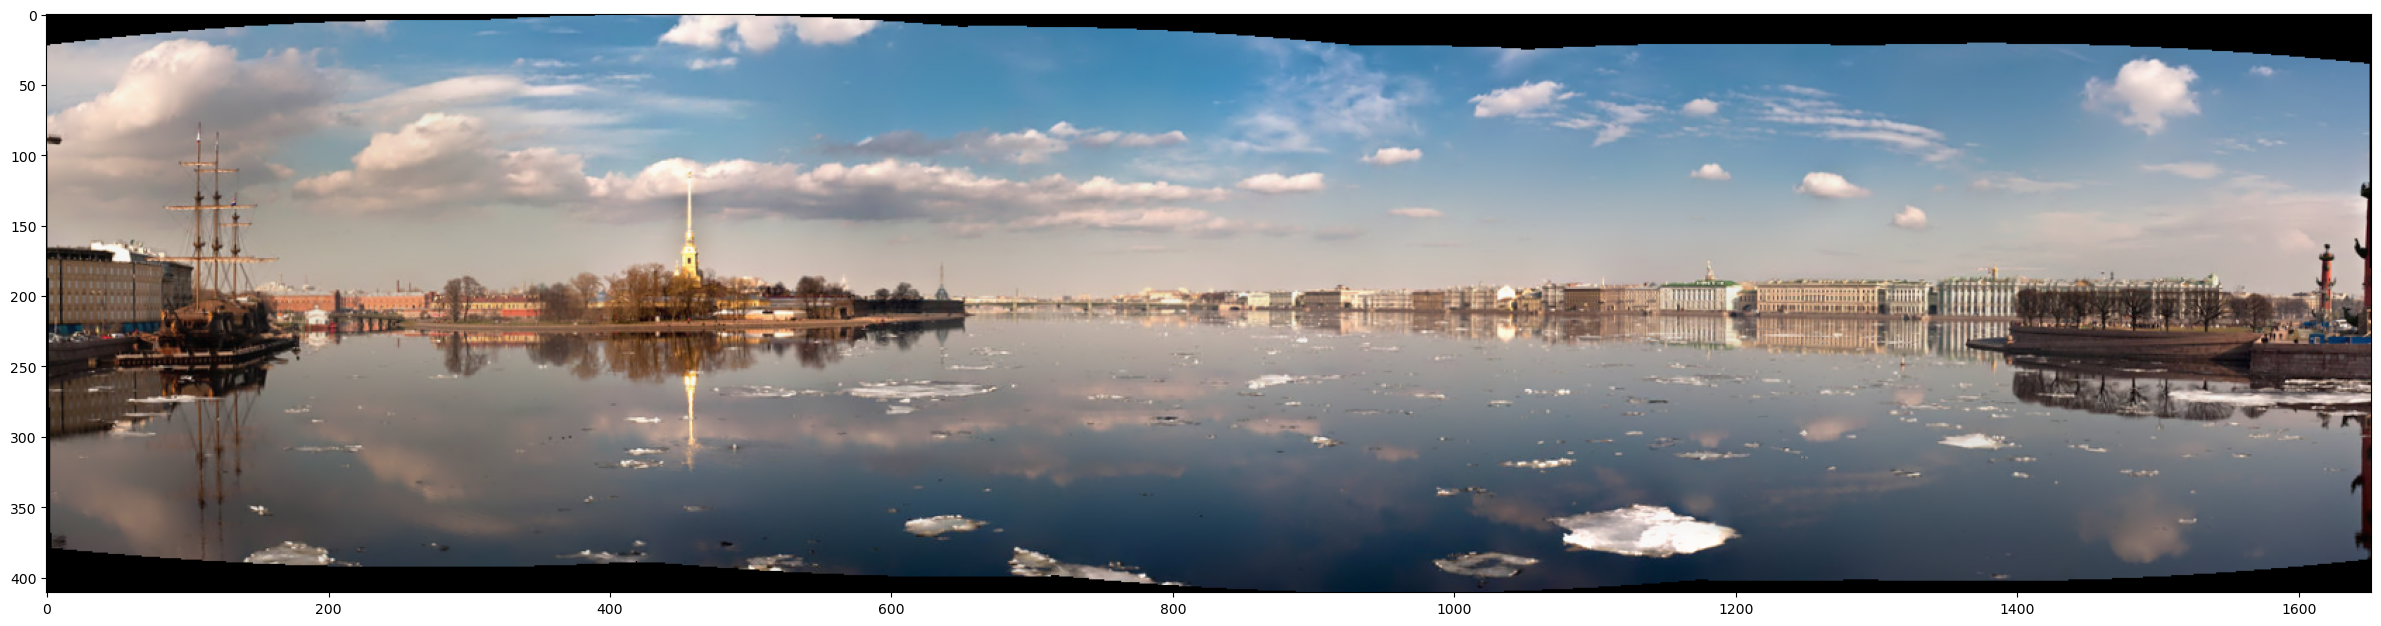

In [10]:
# Stitch Images
stitcher = cv2.Stitcher_create()
status, result = stitcher.stitch(images)

if status == 0:
    plt.figure(figsize=[30, 10])
    plt.imshow(result)